<a href="https://colab.research.google.com/github/chipojaya1/myNEBDHub/blob/main/Analyzing_Pandemmic_Response_Project_Chipo_Jaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis of Japan's COVID-19 Response Case Study**

---
This section explores trends in cases, deaths, and policy measures in Japan iusing the OxCGRT dataset.

## <font color='crimson'>**Milestone #1 - Project Kick-off, Data Exploration, and Cleaning**</font>

GOAL: The main goal of this milestone is to set up your environment, install the required packages, load the data and do some basic exploratory data analysis.

### **Environment Setup**

In [1]:
# Loading libraries
import pandas as pd                       # for data manipulation and analysis
import matplotlib.pyplot as plt           # for 2D plotting
from matplotlib.dates import DateFormatter
import seaborn as sns                     # for statistical data visualization
sns.set(style='whitegrid')                # Set visual style for seaborn
import plotly.express as px               # for interactive data visualization

import folium                             # for data visualization on an interactive leaflet map
import geopandas as gpd

import warnings
warnings.simplefilter("ignore")

In [2]:
# Getting started
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Data Preparation**

In [4]:
# Read the data
df_global = pd.read_csv("/content/drive/MyDrive/Analyzing Pandemic Responses Project/data/OxCGRT_compact_national_v1.csv")
df_global.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,...,V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0


### **Initial Data Exploration**

In [5]:
# Inspecting the data
df_global.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202760 entries, 0 to 202759
Data columns (total 56 columns):
 #   Column                                                                           Non-Null Count   Dtype  
---  ------                                                                           --------------   -----  
 0   CountryName                                                                      202760 non-null  object 
 1   CountryCode                                                                      202760 non-null  object 
 2   RegionName                                                                       0 non-null       float64
 3   RegionCode                                                                       0 non-null       float64
 4   Jurisdiction                                                                     202760 non-null  object 
 5   Date                                                                             202760 non-null  int64  
 

In [6]:
# Summary Statistics
global_stats = df_global.describe()
global_stats

,RegionName,RegionCode,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,C3M_Cancel public events,C3M_Flag,C4M_Restrictions on gatherings,...,V2G_Frontline workers (healthcare),V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
count,0.0,0.0,2.027600e+05,202760.000000,128263.000000,202760.000000,133824.000000,202760.000000,138576.000000,202760.000000,...,127138.000000,202760.000000,90957.000000,2.016640e+05,2.016640e+05,200568.000000,202760.000000,202760.000000,202760.000000,202760.000000
mean,NaN,NaN,2.021066e+07,1.193199,0.835268,1.149645,0.797630,1.103250,0.858857,2.010209,...,1.803316,3.100533,0.278681,1.340886e+06,1.955307e+04,22.603420,42.675426,44.857776,46.699253,31.968029
std,NaN,NaN,8.174621e+03,1.139102,0.370940,0.988767,0.401768,0.851878,0.348170,1.710198,...,0.471447,2.411897,0.448353,5.583371e+06,7.556113e+04,29.597555,24.930305,19.649721,19.865910,32.962193
min,NaN,NaN,2.020010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,2.020098e+07,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,2.000000,0.000000,0.000000,5.146750e+03,6.400000e+01,0.000000,22.220000,31.250000,33.330000,0.000000
50%,NaN,NaN,2.021070e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,...,2.000000,5.000000,0.000000,5.987900e+04,8.650000e+02,2.330000,42.590000,46.880000,48.720000,25.000000
75%,NaN,NaN,2.022040e+07,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,4.000000,...,2.000000,5.000000,1.000000,5.218538e+05,7.470000e+03,46.570000,62.040000,60.000000,62.020000,62.500000
max,NaN,NaN,2.022123e+07,3.000000,1.000000,3.000000,1.000000,2.000000,1.000000,4.000000,...,2.000000,5.000000,1.000000,1.007653e+08,1.092764e+06,105.750000,100.000000,91.150000,93.450000,100.000000


### **Data Cleaning and Preprocessing**

In [7]:
# show unique country name and country code values
df_global['CountryName'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of Congo', 'Congo', 'Colombia', 'Cape Verde',
       'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'France', 'Faeroe Islands', 'Gabon',
       'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Greece',
       'Greenland', 'Guatemala', 'Guam', 'Guyana', 'Hong Kong',
      

In [8]:
# Create a dataframe with data from Japan only
df_japan = df_global.loc[(df_global['CountryName'] == 'Japan')].copy()
df_japan.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1M_School closing,C1M_Flag,C2M_Workplace closing,C2M_Flag,...,V3_Vaccine Financial Support (summary),V4_Mandatory Vaccination (summary),ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex
93160,Japan,JPN,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
93161,Japan,JPN,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
93162,Japan,JPN,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
93163,Japan,JPN,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0
93164,Japan,JPN,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,0.0,NaN,...,0,NaN,0.0,0.0,NV,0.0,0.0,0.0,0.0,0.0


### **Data Transformation**

In [10]:
# Convert date to date format
df_japan['Date'] = pd.to_datetime(df_japan['Date'].astype(str),  format='%Y%m%d', errors='coerce')
df_japan = df_japan.sort_values('Date')
print('Japan rows:', len(df_japan))
print('Date range:', df_japan['Date'].min().date(), 'to', df_japan['Date'].max().date())

Japan rows: 1096
Date range: 2020-01-01 to 2022-12-31


Handling Categorical data

In [11]:
# Convert categorical column into appropriate datatype
df_japan['MajorityVaccinated']= df_japan['MajorityVaccinated'].astype('category')
df_japan['MajorityVaccinated'].unique()

['NV', 'V']
Categories (2, object): ['NV', 'V']

Missing values

In [14]:
# Leverage the isnull() and sum() functions to find the number of missing values in each column
missing_values = df_japan.isnull().sum()
missing_values

,0
CountryName,0
CountryCode,0
RegionName,1096
RegionCode,1096
Jurisdiction,0
Date,0
C1M_School closing,0
C1M_Flag,61
C2M_Workplace closing,0
C2M_Flag,175


In [15]:
# Turn the missing value counts into percentages
missing_values_percentage = (missing_values / len(df_japan)) * 100
missing_values_percentage

,0
CountryName,0.000000
CountryCode,0.000000
RegionName,100.000000
RegionCode,100.000000
Jurisdiction,0.000000
Date,0.000000
C1M_School closing,0.000000
C1M_Flag,5.565693
C2M_Workplace closing,0.000000
C2M_Flag,15.967153


In [16]:
# Leverage the isnull() and sum() functions to find the number of missing values in each column
missing_values = df_japan.isnull().sum()

# Turn the missing value counts into percentages
missing_values_percentage = (missing_values / len(df_japan)) * 100

# Return counts and percentages of missing values in each column
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage.round(2)})
missing_data

,Missing Values,Percentage
CountryName,0,0.00
CountryCode,0,0.00
RegionName,1096,100.00
RegionCode,1096,100.00
Jurisdiction,0,0.00
Date,0,0.00
C1M_School closing,0,0.00
C1M_Flag,61,5.57
C2M_Workplace closing,0,0.00
C2M_Flag,175,15.97


Here's an overview of the missing values in the dataset:

Columns such as ConfirmedCases, ConfirmedDeaths, and policy indices (StringencyIndex, Investment in vaccines, Facial Coverings, etc.) have 0% missing values, ensuring reliability for core analysis.

RegionName/RegionCode is 100% missing and it is normal since this is national-level data.

Other notable variables with significant missing data include Flag, Mandatory Vaccination, and Fiscal Measures.

In [17]:
# Drop region name and region code col since 100% missing
df_japan.drop(columns=['RegionName', 'RegionCode'], inplace=True)

In [18]:
# Convert flag columns to boolean where necessary
flag_columns = [col for col in df_japan.columns if 'Flag' in col]
for col in flag_columns:
    df_japan[col] = df_japan[col].fillna(0).astype(bool)

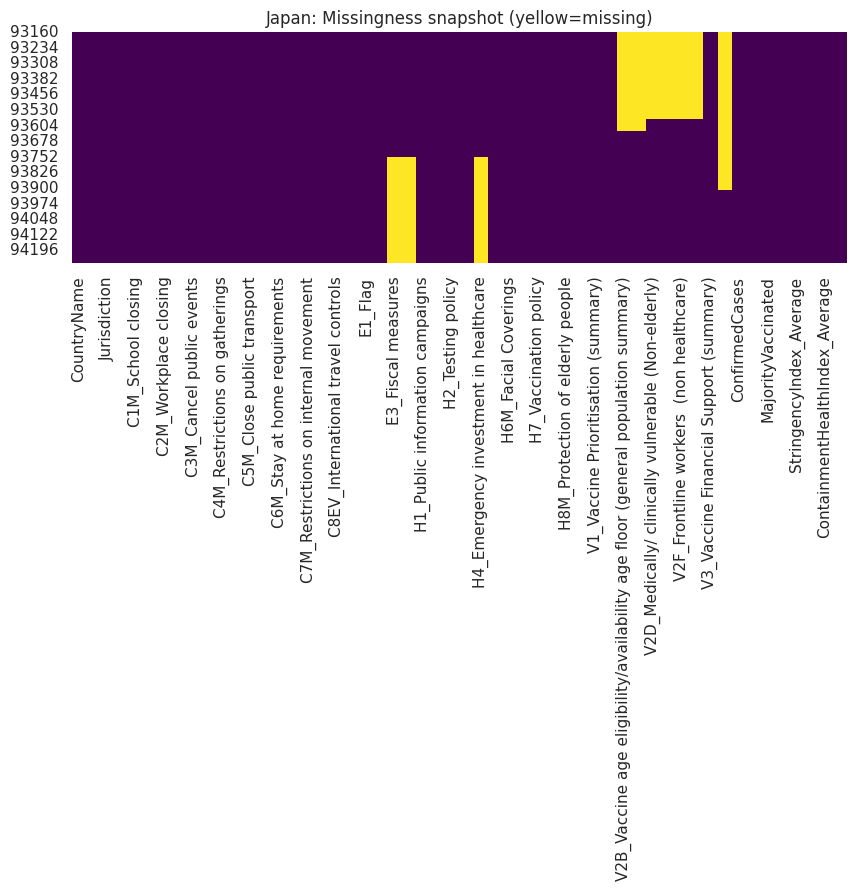

In [22]:
# Heatmap showing missing values
plt.figure(figsize=(10,3))
sns.heatmap(df_japan.isnull(), cbar=False, cmap='viridis')
plt.title('Japan: Missingness snapshot (yellow=missing)')
plt.tight_layout()

Daily and Rolling signals

In [23]:
# Daily deltas from cumulative, plus 7-day means for smooth EDA lines
df_japan['DailyCases']  = df_japan['ConfirmedCases'].diff().clip(lower=0)
df_japan['DailyDeaths'] = df_japan['ConfirmedDeaths'].diff().clip(lower=0)
df_japan['Cases_7dayAvg']  = df_japan['DailyCases'].rolling(7, min_periods=1).mean()
df_japan['Deaths_7dayAvg'] = df_japan['DailyDeaths'].rolling(7, min_periods=1).mean()

In [24]:
# Save the cleaned data for use in a new ipynb
df_japan.to_csv('cleaned_japan_data.csv', index=False)

### **Exporatory Data Analysis**

In [25]:
df_clean = pd.read_csv('cleaned_japan_data.csv', parse_dates=['Date'])
df_clean.describe()

,Date,C1M_School closing,C2M_Workplace closing,C3M_Cancel public events,C4M_Restrictions on gatherings,C5M_Close public transport,C6M_Stay at home requirements,C7M_Restrictions on internal movement,C8EV_International travel controls,E1_Income support,...,ConfirmedDeaths,PopulationVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex,DailyCases,DailyDeaths,Cases_7dayAvg,Deaths_7dayAvg
count,1096,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,...,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,2021-07-01 12:00:00,1.150547,0.985401,0.982664,0.768248,0.093066,0.857664,0.920620,3.008212,1.583942,...,16225.742701,37.470091,40.358184,49.889754,44.706651,86.177007,26698.335160,52.314155,26268.907763,51.392303
min,2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020-09-30 18:00:00,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3.000000,2.000000,...,1581.000000,0.000000,35.190000,48.440000,41.670000,100.000000,437.500000,6.000000,489.571429,6.571429
50%,2021-07-01 12:00:00,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,3.000000,2.000000,...,14820.500000,15.690000,43.080000,52.080000,46.650000,100.000000,2508.000000,25.000000,2508.142857,28.000000
75%,2022-04-01 06:00:00,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,4.000000,2.000000,...,28215.750000,81.300000,47.220000,56.670000,50.480000,100.000000,32425.500000,65.000000,34193.785714,64.500000
max,2022-12-31 00:00:00,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,4.000000,2.000000,...,57274.000000,83.220000,55.090000,61.870000,56.420000,100.000000,260999.000000,420.000000,226955.000000,327.714286
std,NaN,0.636887,0.552096,0.271425,0.624562,0.290657,0.349554,0.270454,1.174666,0.777701,...,15377.587004,38.669190,10.284434,10.878847,9.131039,28.438537,49394.566327,70.769561,47476.543962,66.493364


### **Visualizations**

Inspecting Confirmed Cases

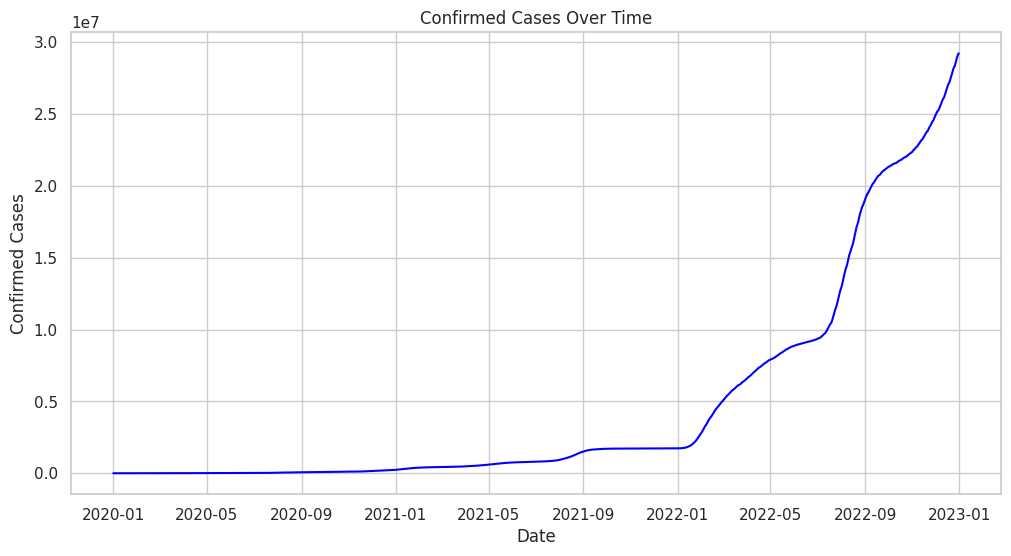

In [26]:
# Plotting confirmed number of cases overtime per week
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='ConfirmedCases', data=df_clean, color='blue')
plt.title('Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

Text(0, 0.5, 'Daily Cases')

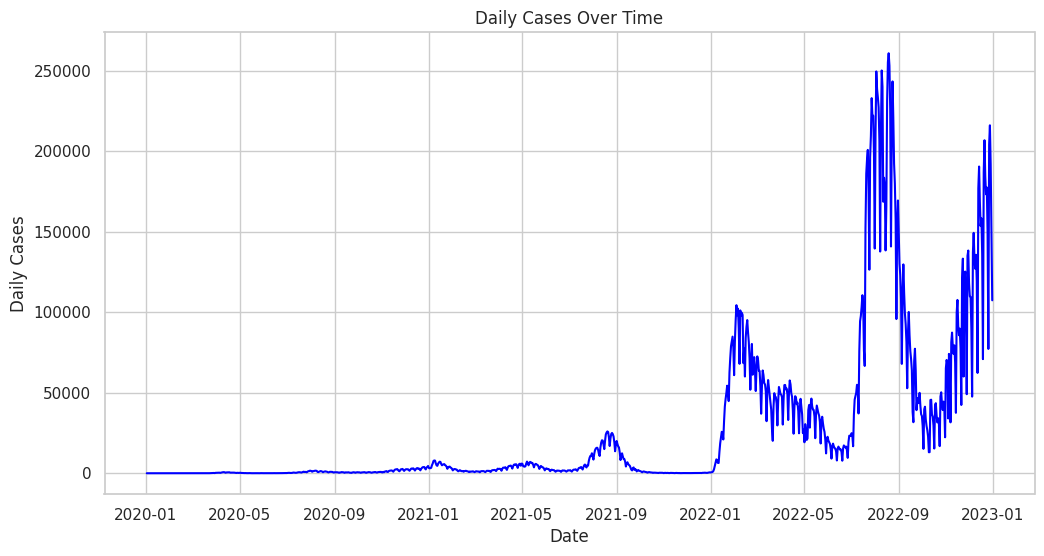

In [27]:
# Plot Daily new cases
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='DailyCases', data=df_clean, color='blue')
plt.title('Daily Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Cases')

Text(0, 0.5, '7-Day Moving Average')

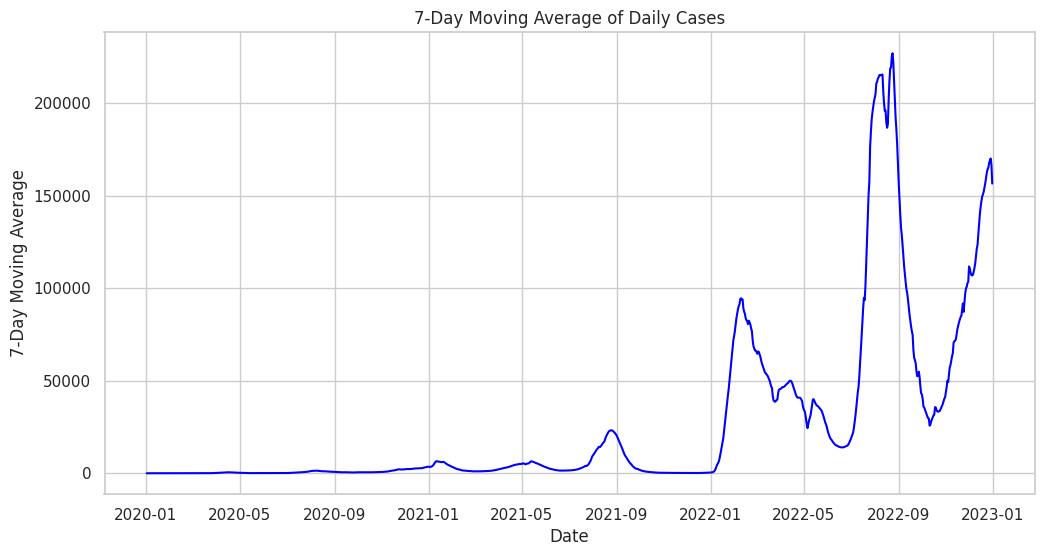

In [28]:
# Plotting 7 day moving average of cases
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Cases_7dayAvg', data=df_clean, color='blue')
plt.title('7-Day Moving Average of Daily Cases')
plt.xlabel('Date')
plt.ylabel('7-Day Moving Average')

**Inspecting Daily Deaths**

Text(0, 0.5, 'Confirmed Deaths')

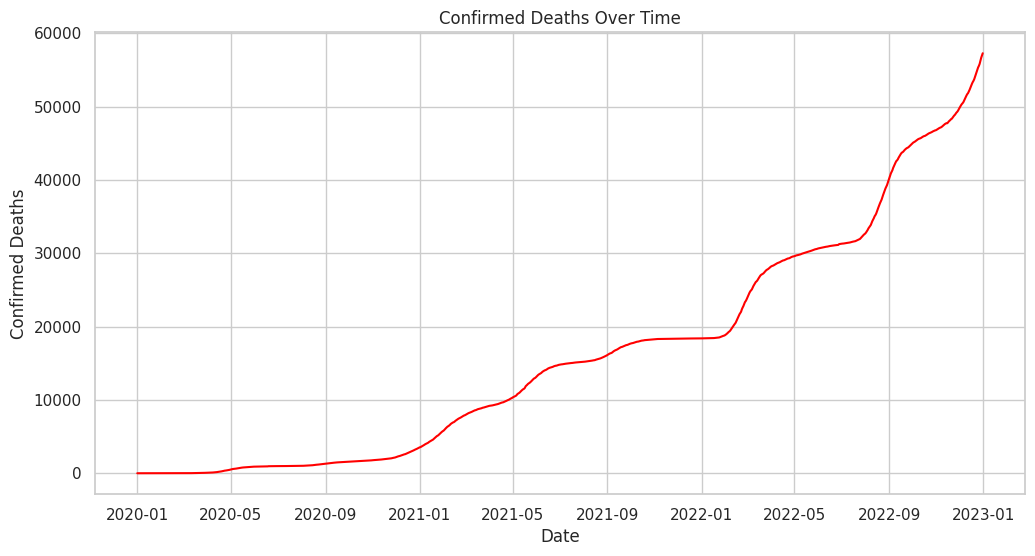

In [29]:
# Plotting confirmed number of deaths overtime
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='ConfirmedDeaths', data=df_clean, color='red')
plt.title('Confirmed Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Deaths')

Text(0, 0.5, 'Daily Deaths')

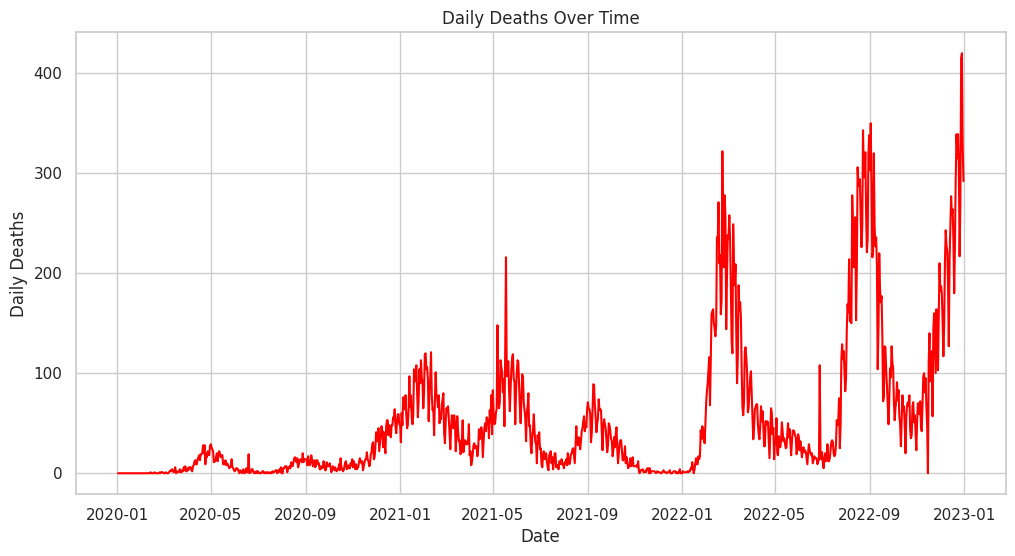

In [30]:
# plot daily new deaths
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='DailyDeaths', data=df_clean, color='red')
plt.title('Daily Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Deaths')

Text(0.5, 0, 'Date')

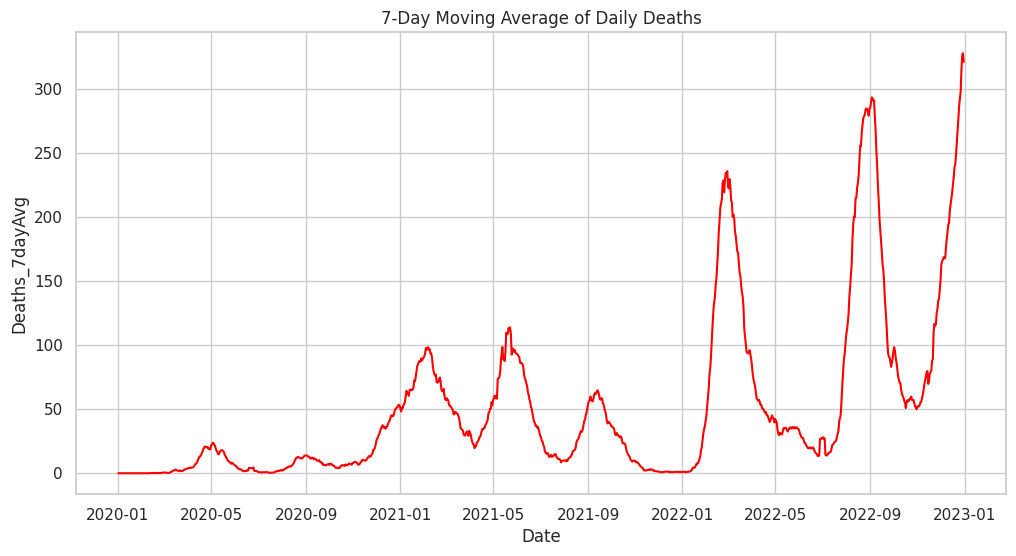

In [31]:
# Plotting 7 day moving average of deaths
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Deaths_7dayAvg', data=df_clean, color='red')
plt.title('7-Day Moving Average of Daily Deaths')
plt.xlabel('Date')

**Introducing Policy Events**

In [57]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 58 columns):
 #   Column                                                                           Non-Null Count  Dtype         
---  ------                                                                           --------------  -----         
 0   CountryName                                                                      1096 non-null   object        
 1   CountryCode                                                                      1096 non-null   object        
 2   Jurisdiction                                                                     1096 non-null   object        
 3   Date                                                                             1096 non-null   datetime64[ns]
 4   C1M_School closing                                                               1096 non-null   float64       
 5   C1M_Flag                                                             

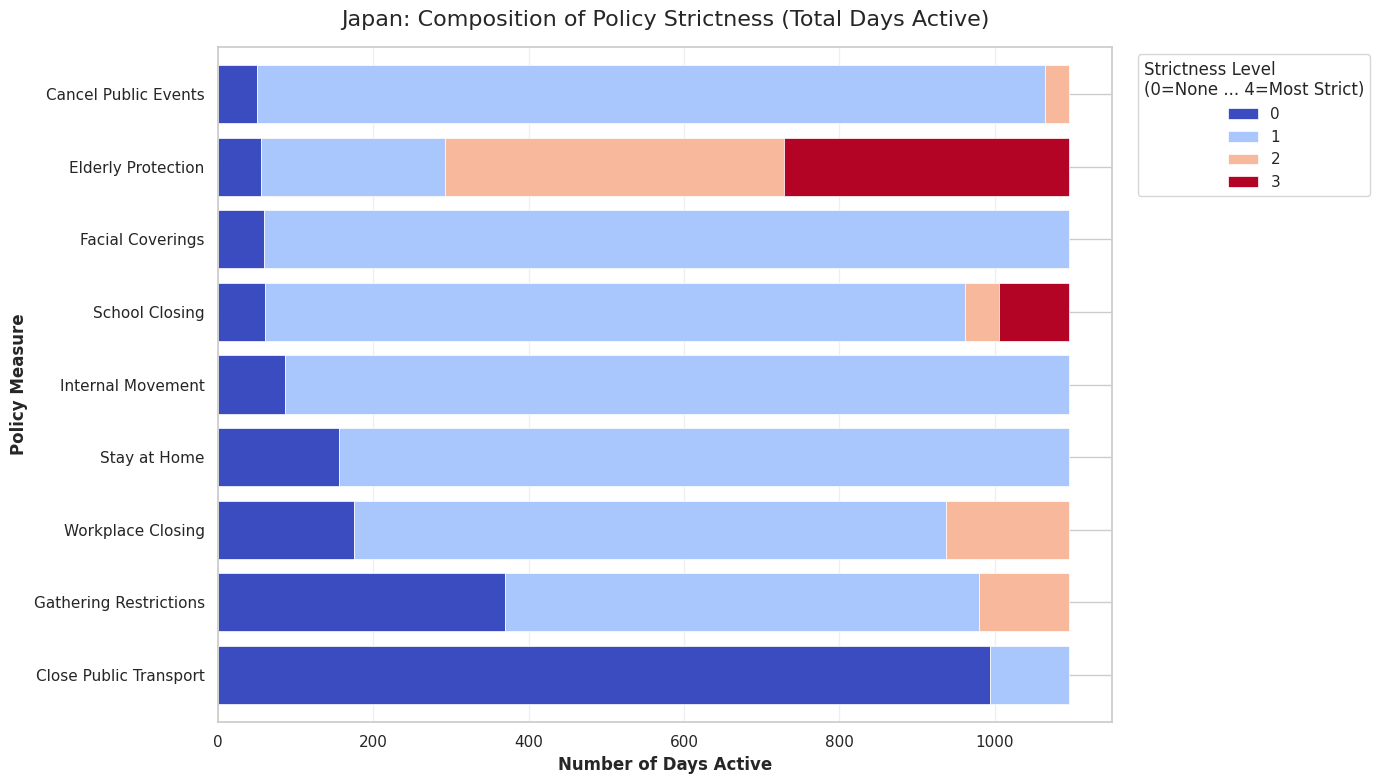

In [52]:
# Policy events
policy_titles = {
    'C1M_School closing': 'School Closing',
    'C2M_Workplace closing': 'Workplace Closing',
    'C3M_Cancel public events': 'Cancel Public Events',
    'C4M_Restrictions on gatherings': 'Gathering Restrictions',
    'C5M_Close public transport': 'Close Public Transport',
    'C6M_Stay at home requirements': 'Stay at Home',
    'C7M_Restrictions on internal movement': 'Internal Movement',
    'H6M_Facial Coverings': 'Facial Coverings',
    'H8M_Protection of elderly people': 'Elderly Protection'
}

# Aggregate data for the summary plot
data = []
for col, title in policy_titles.items():
    # Count days at each level (0, 1, 2...)
    counts = df_clean[col].value_counts()
    for level, count in counts.items():
        data.append({'Policy': title, 'Level': int(level), 'Days': count})

df_summary = pd.DataFrame(data)

# Pivot data: Rows=Policies, Columns=Levels, Values=Days
df_pivot = df_summary.pivot(index='Policy', columns='Level', values='Days').fillna(0)
# Sort by Level 0 (descending) so policies with most "No Measure" days are at the bottom
df_pivot = df_pivot.sort_values(by=0, ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Use a diverging colormap: Blue (Level 0) -> Red (Level 4)
df_pivot.plot(kind='barh', stacked=True, ax=ax, cmap='coolwarm', edgecolor='white', linewidth=0.5, width=0.8)

# Styling
plt.title('Japan: Composition of Policy Strictness (Total Days Active)', fontsize=16, pad=15)
plt.xlabel('Number of Days Active', fontsize=12, fontweight='bold')
plt.ylabel('Policy Measure', fontsize=12, fontweight='bold')

# Custom Legend
plt.legend(title='Strictness Level\n(0=None ... 4=Most Strict)',
           bbox_to_anchor=(1.02, 1), loc='upper left', frameon=True)

# Add grid and layout adjustments
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

Observations:

In [58]:
# Save current df as df_jp
df_jp = df_clean.copy()

 ## <font color='crimson'>**Milestone #2 - Applying Analytical Strategies**</font>

Key question:
*How did the pandemic look like over time?*

## Time Series Analysis

In [59]:
# Loading necessary libraries for time series analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL, seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from matplotlib.ticker import FuncFormatter

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = [12, 6]

# Load and prepare data
df_jp['Date'] = pd.to_datetime(df_jp['Date'])
df_jp = df_jp.set_index('Date')

In [60]:
# Create weekly aggregated data
wk = pd.DataFrame({
    'weekly_cases': df_jp['DailyCases'].resample('W-SUN').sum(),
    'stringency_wk': df_jp['StringencyIndex_Average'].resample('W-SUN').mean()
}).dropna()

# Smoothing for trend visualization
wk['cases_7w'] = wk['weekly_cases'].rolling(3, min_periods=1).mean()
wk = wk.asfreq('W-SUN')

## Deconstructing data into trend, seasonal, and residual components

Deconstructing data into trend, seasonal, and residual components...


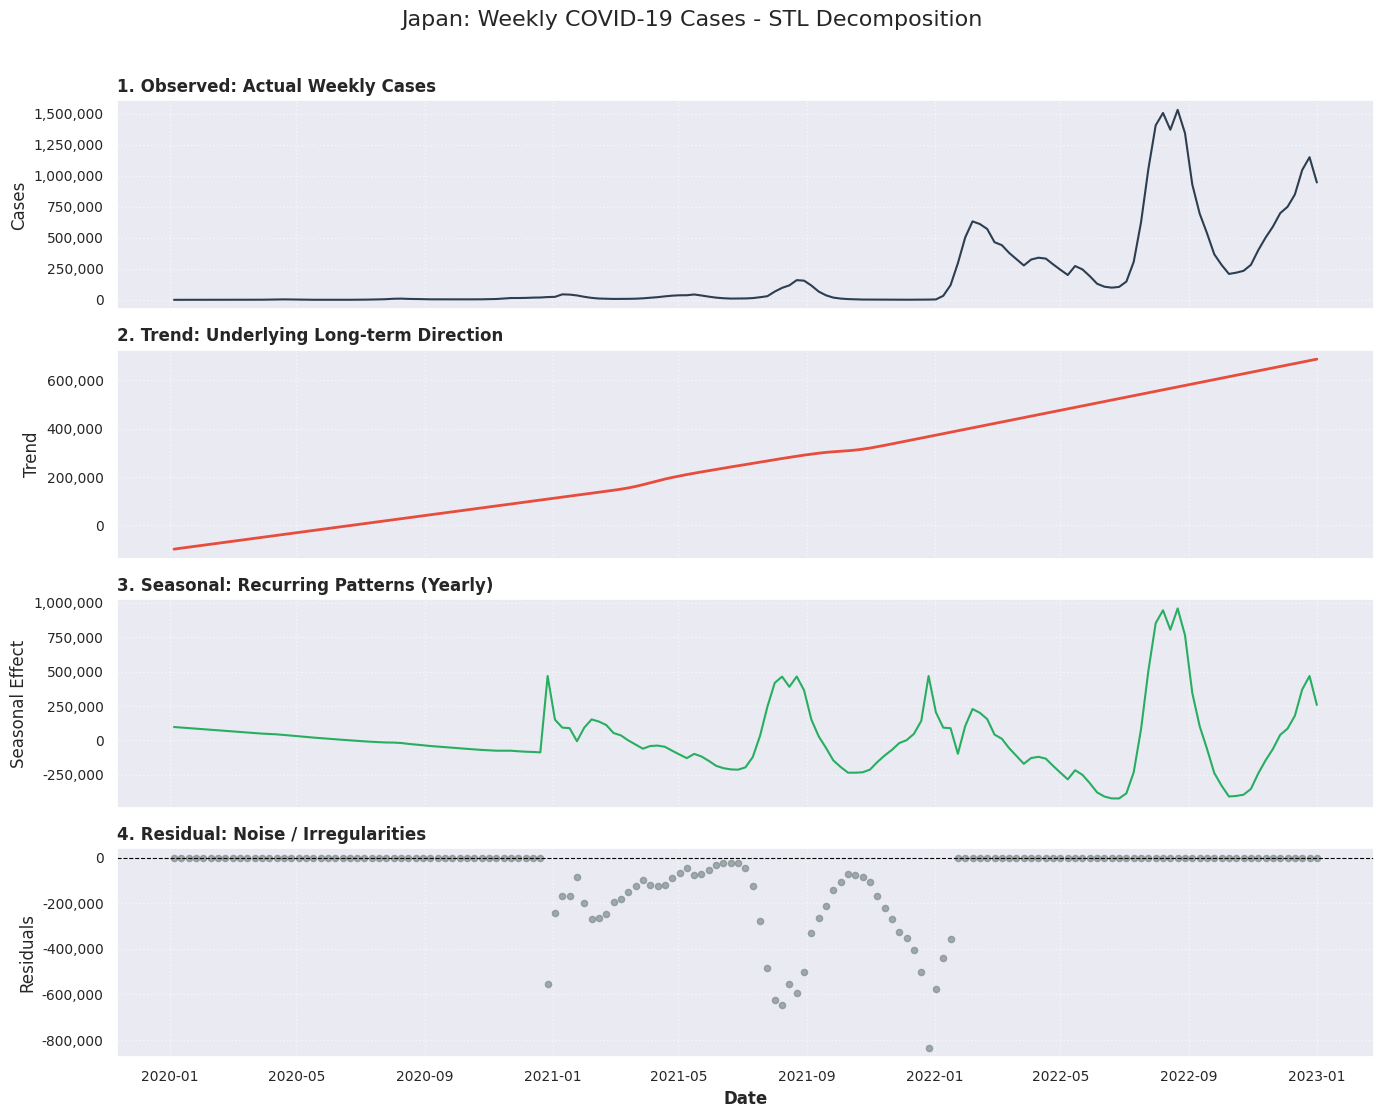

Decomposition completed: Separated into trend, seasonal, and residual components
Why it matters: Helps identify underlying patterns beyond random fluctuations


In [63]:
print("Deconstructing data into trend, seasonal, and residual components...")

# STL Decomposition (Ensure data is ready)
y = wk['weekly_cases'].astype(float).fillna(0.0)
stl = STL(y, period=52, robust=True)  # 52 weeks for yearly seasonality
res = stl.fit()

# Plot decomposition with improved styling
fig, axes = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

# 1. Observed
axes[0].plot(res.observed, color='#2c3e50', linewidth=1.5)
axes[0].set_title('1. Observed: Actual Weekly Cases', fontsize=12, fontweight='bold', loc='left')
axes[0].set_ylabel('Cases')

# 2. Trend
axes[1].plot(res.trend, color='#e74c3c', linewidth=2)
axes[1].set_title('2. Trend: Underlying Long-term Direction', fontsize=12, fontweight='bold', loc='left')
axes[1].set_ylabel('Trend')

# 3. Seasonal
axes[2].plot(res.seasonal, color='#27ae60', linewidth=1.5)
axes[2].set_title('3. Seasonal: Recurring Patterns (Yearly)', fontsize=12, fontweight='bold', loc='left')
axes[2].set_ylabel('Seasonal Effect')

# 4. Residual
axes[3].scatter(res.resid.index, res.resid, color='#7f8c8d', alpha=0.7, s=20)
axes[3].axhline(0, color='black', linestyle='--', linewidth=0.8)
axes[3].set_title('4. Residual: Noise / Irregularities', fontsize=12, fontweight='bold', loc='left')
axes[3].set_ylabel('Residuals')

# Common Formatting
comma_fmt = FuncFormatter(lambda x, p: format(int(x), ','))

for ax in axes:
    ax.grid(True, linestyle=':', alpha=0.6)
    ax.yaxis.set_major_formatter(comma_fmt)
    ax.tick_params(axis='both', which='major', labelsize=10)

plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.suptitle('Japan: Weekly COVID-19 Cases - STL Decomposition', fontsize=16, y=0.96)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust for suptitle
plt.show()

print("Decomposition completed: Separated into trend, seasonal, and residual components")
print("Why it matters: Helps identify underlying patterns beyond random fluctuations")

Observations:
1. weekly cases are stagnant at first then they start increasing rapidly over time
2. There is an increasing trend over time
3. Seasonality seems to be present in the data
4. There are irregularities present

### Time series trend


=== TREND ANALYSIS ===
Identifying long-term patterns and peak infection waves...


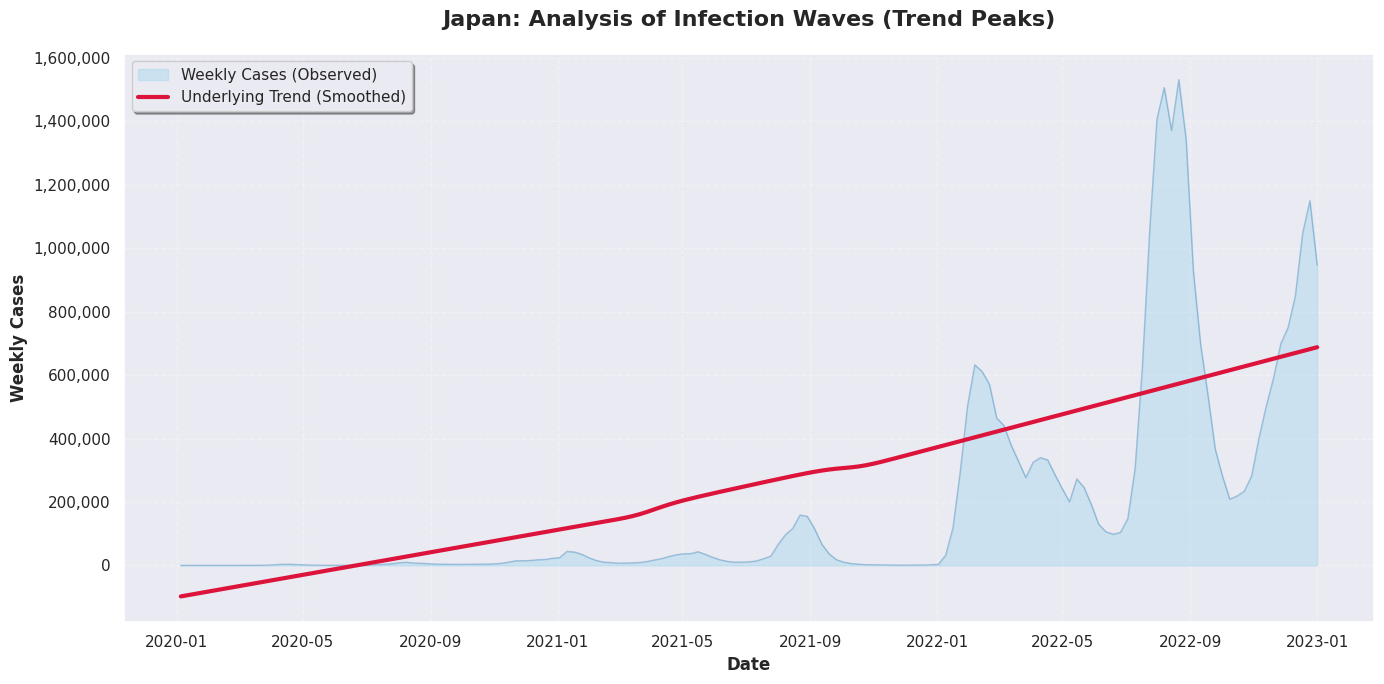

Trend Analysis Complete
Identified 0 distinct major waves in the trend component.


In [67]:
from scipy.signal import find_peaks

print("=== TREND ANALYSIS ===")
print("Identifying long-term patterns and peak infection waves...")

# Ensure 'res' (decomposition result) is available
if 'res' not in locals():
    print("Re-calculating decomposition for trend...")
    y = wk['weekly_cases'].astype(float).fillna(0.0)
    stl = STL(y, period=52, robust=True)
    res = stl.fit()

# Find peaks in the trend component
# Adjusted distance to 8 weeks to catch waves that are closer together
peaks, _ = find_peaks(res.trend, distance=8, height=100)
peak_dates = res.trend.index[peaks]
peak_values = res.trend.iloc[peaks]

# Plot setup
fig, ax = plt.subplots(figsize=(14, 7))

# 1. Actual Cases (Background Context)
ax.fill_between(wk.index, wk['weekly_cases'], color='skyblue', alpha=0.3, label='Weekly Cases (Observed)')
ax.plot(wk.index, wk['weekly_cases'], color='steelblue', alpha=0.4, linewidth=1)

# 2. Trend Line (Foreground Focus)
ax.plot(wk.index, res.trend, color='crimson', linewidth=3, label='Underlying Trend (Smoothed)')

# 3. Peak Annotation
if len(peaks) > 0:
    for date, value in zip(peak_dates, peak_values):
        # Mark the point
        ax.plot(date, value, 'o', color='darkred', markersize=8, zorder=5, markeredgecolor='white')

        # Add text label
        label_text = f"{date.strftime('%b %Y')}\n{int(value):,}"
        ax.annotate(label_text,
                    xy=(date, value),
                    xytext=(0, 15), textcoords='offset points',
                    ha='center', va='bottom',
                    fontsize=9, fontweight='bold', color='#c0392b',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="#c0392b", alpha=0.8))
else:
    print("Warning: No peaks found. Try adjusting 'distance' or 'height' parameters.")

# Formatting
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_title('Japan: Analysis of Infection Waves (Trend Peaks)', fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Weekly Cases', fontsize=12, fontweight='bold')
ax.set_xlabel('Date', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(loc='upper left', frameon=True, shadow=True)

plt.tight_layout()
plt.show()

print("Trend Analysis Complete")
print(f"Identified {len(peaks)} distinct major waves in the trend component.")

### Seasonal Component


=== SEASONAL ANALYSIS ===
Identifying recurring seasonal patterns...


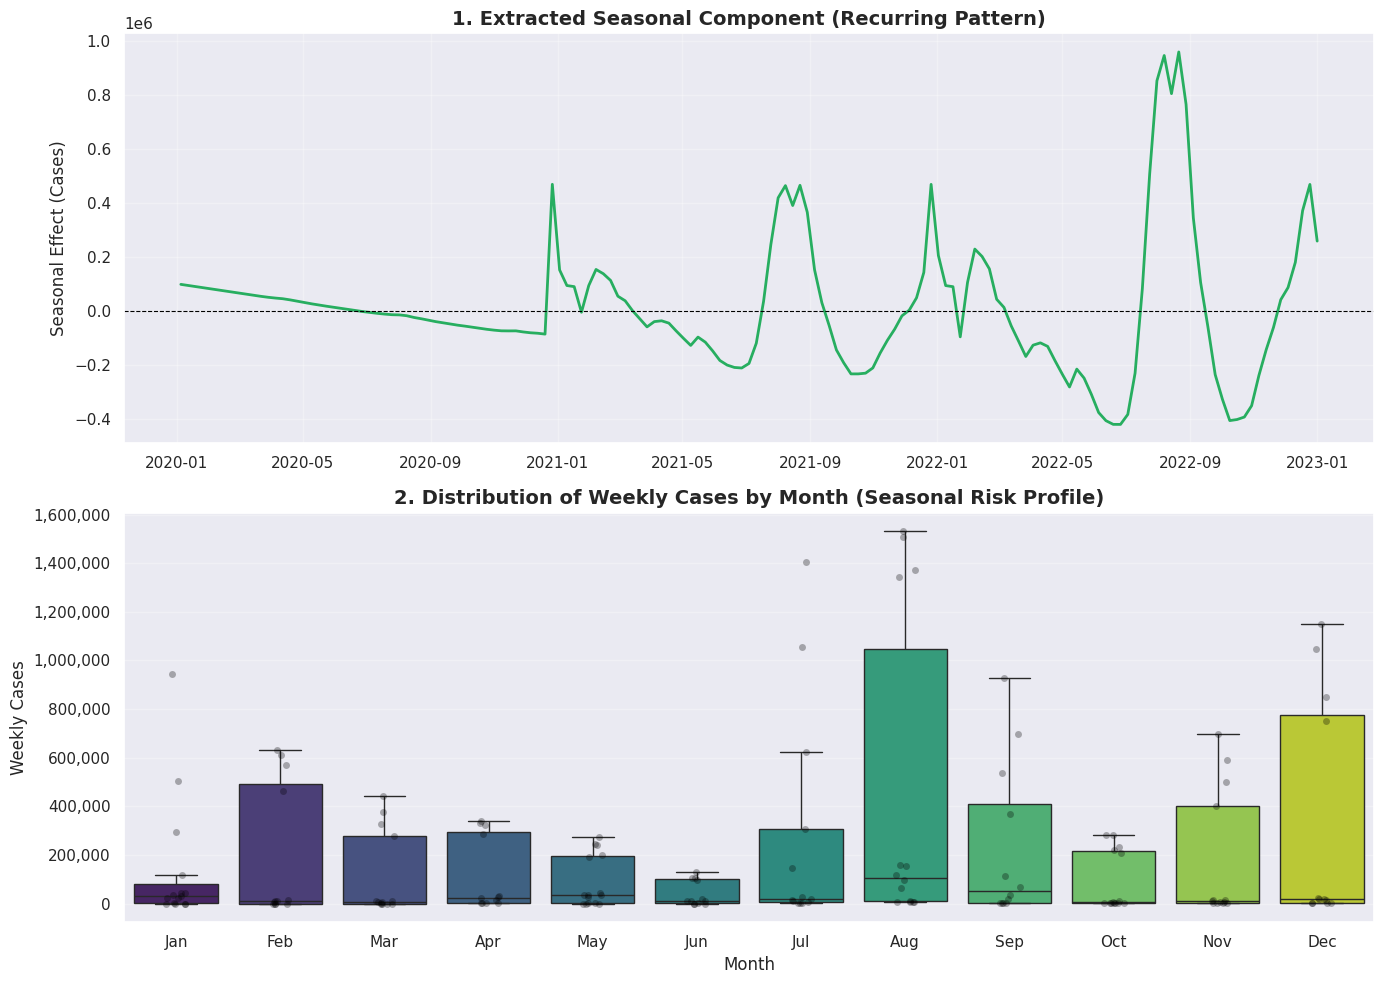

Seasonal Analysis Complete
Top chart shows the mathematical seasonal wave.
Bottom chart shows the spread of actual cases for each month, revealing high-risk periods.


In [69]:
import calendar

print("\n=== SEASONAL ANALYSIS ===")
print("Identifying recurring seasonal patterns...")

# Ensure 'res' exists (Safety check)
if 'res' not in locals():
    y = wk['weekly_cases'].astype(float).fillna(0.0)
    stl = STL(y, period=52, robust=True)
    res = stl.fit()

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# 1. Seasonal Component from STL
ax1.plot(res.seasonal.index, res.seasonal, color='#27ae60', linewidth=2)
ax1.set_title('1. Extracted Seasonal Component (Recurring Pattern)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Seasonal Effect (Cases)')
ax1.grid(True, alpha=0.3)
ax1.axhline(0, color='black', linewidth=0.8, linestyle='--')

# 2. Monthly Distribution (Boxplot)
# Prepare data: Extract month names and values
mview = wk.assign(month_num=wk.index.month).dropna()
mview['Month'] = mview['month_num'].apply(lambda x: calendar.month_abbr[x])

# Sort by month number to ensure Jan-Dec order
mview = mview.sort_values('month_num')

# Boxplot with overlaid strip plot for detail
sns.boxplot(data=mview, x='Month', y='weekly_cases', ax=ax2, palette='viridis', showfliers=False) # Hide extreme outliers from box to focus on IQR
sns.stripplot(data=mview, x='Month', y='weekly_cases', ax=ax2, color='black', alpha=0.3, jitter=True) # Show actual data points

ax2.set_title('2. Distribution of Weekly Cases by Month (Seasonal Risk Profile)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Weekly Cases')
ax2.set_xlabel('Month')
ax2.grid(True, axis='y', alpha=0.3)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()

print("Seasonal Analysis Complete")
print("Top chart shows the mathematical seasonal wave.")
print("Bottom chart shows the spread of actual cases for each month, revealing high-risk periods.")